# Decision Tree example - Regression

- **Purpose:** Predict Boston housing prices using census data
- **Data:** Boston Housing prices. For more info follow <a href="https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass." target="_blank">this link</a> 
- **Author:** Emily Diaz
- **Date:** October 6th of 2020 

Process steps: 
1. [Import modules](#importmod)
2. [Load data](#loaddata)
3. [Profiling](#profiling)
4. [Data prep](#dataprep)
5. [Modeling](#modeling)


Useful links: 
- https://towardsdatascience.com/baby-steps-towards-data-science-decision-tree-regression-in-python-323beeacbb6e
- https://scikit-learn.org/stable/modules/tree.html
- https://www.datasciencecentral.com/profiles/blogs/introduction-to-classification-regression-trees-cart#:~:text=A%20simple%20example%20of%20a,be%20split%20no%20more%3B%20and
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/

# What is a Decision Tree

In [85]:
import os # for changing directory
os.chdir('/Users/Natasha_Diaz/Box Sync/Capability Building (shared with client)/Learn - Data Science Topics')

<img src="img/DT_example.png" />

Decision Tree is a *Supervised Learning* technique that can be used for **classification and regression** problems. The most popular type is called **CART** (Classification and Regression Trees). The algorithm is structured as a sequence of questions, that returns a tree like structure where the ends are terminal nodes at which point there are no more questions and we get the final result (category or numeric) for that set of characteristics.

The metric that it considers to find the best split is **GINI impurity**, which is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. 

Other important characteristics of this method are: 
- CART is nonparametric and therefore does not rely on data belonging to a particular type of distribution
- CART is not significantly impacted by outliers in the input variables
- CART can use the same variables more than once in different parts of the tree.  This capability can uncover complex interdependencies between sets of variables
- Is the base for more complex ensemble and boosting methods such as Random Forest and GBM

Disadvantages: 
- Trees are very sensitive to small change in the training data leading to significant changes on final predictions (robustness issue)
- They tend to overfit (can be solved with pruning)

***

<a id="importmod"></a>
## 1. Import modules

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport # profiling
from sklearn.preprocessing import MinMaxScaler # scaling data to 0-1 range
from sklearn.model_selection import train_test_split #train/test split
from sklearn.tree import DecisionTreeRegressor # to create decision tree
from sklearn import tree # to plot tree
from sklearn.model_selection import cross_val_score # to obtain accuracy of model
from sklearn.model_selection import GridSearchCV # for parameter tuning

In [87]:
# Random seed: to always get the same results/reproducibility
random_seed =42

<a id="loaddata"></a>
## 2. Load data

In [88]:
filename = ("/Users/Natasha_Diaz/Box Sync/Capability Building (shared with client)/Learn - Data Science Topics/1_Input/housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
print(dataset.shape)
dataset.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<a id="profiling"></a>
## 3. Profiling

For more info about this package, follow <a href="https://github.com/pandas-profiling/pandas-profiling" target="_blank">this link</a> 



In [89]:
profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

/Users/Natasha_Diaz/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:160: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
/Users/Natasha_Diaz/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:160: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
/Users/Natasha_Diaz/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:160: MatplotlibDeprecationWarning: You are modifying the state of a

<a id="dataprep"></a>
## 4. Data Prep

### Y and X split (target vs features)

In [90]:
X = dataset.drop(columns= ['MEDV'])
y = dataset['MEDV']

### Scaling - so different scales don't affect the results

In [91]:
# Initialize min/max scaler: this takes data to a 0 to 1 scale
scaler = MinMaxScaler()

In [92]:
scaled_X = scaler.fit_transform(X)

### Test/train split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)


<a id="modeling"></a>
## 5. Modeling

In [94]:
# Initialize decision tree (with default parameters)
dt_model = DecisionTreeRegressor(random_state=random_seed)

In [95]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

[Text(227.02269789650776, 212.26285714285714, 'X[5] <= 0.648\nmse = 87.897\nsamples = 354\nvalue = 23.016'),
 Text(138.13090775642155, 201.90857142857143, 'X[12] <= 0.35\nmse = 41.295\nsamples = 292\nvalue = 20.084'),
 Text(66.8056578773751, 191.5542857142857, 'X[7] <= 0.023\nmse = 26.114\nsamples = 178\nvalue = 23.47'),
 Text(43.46428791344124, 181.2, 'X[0] <= 0.114\nmse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(42.52185300844476, 170.84571428571428, 'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(44.40672281843772, 170.84571428571428, 'mse = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(90.14702784130894, 181.2, 'X[5] <= 0.571\nmse = 14.233\nsamples = 174\nvalue = 22.987'),
 Text(46.291592628430685, 170.84571428571428, 'X[12] <= 0.166\nmse = 7.174\nsamples = 133\nvalue = 21.639'),
 Text(7.775087966220972, 160.49142857142857, 'X[0] <= 0.0\nmse = 2.279\nsamples = 25\nvalue = 23.776'),
 Text(6.83265306122449, 150.13714285714286, 'mse = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(8.7175228712

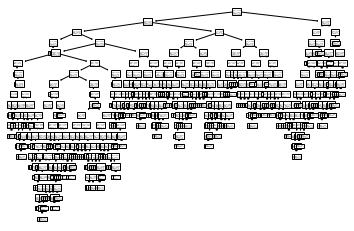

In [96]:
# Show plot
tree.plot_tree(dt_model)

### Report accuracy

In [109]:
score_train = dt_model.score(X_train, y_train)
score_train # r2

1.0

In [97]:
score = dt_model.score(X_test, y_test)
score # r2

0.8559207694719114

### Variable importance plot

<AxesSubplot:>

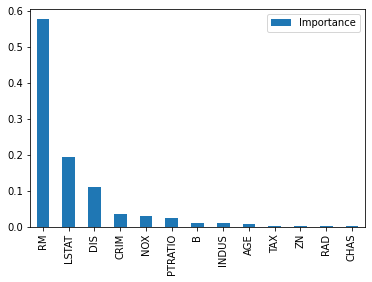

In [98]:
# Get importance
importance = dt_model.feature_importances_
# Adding name of cols
importance = pd.DataFrame(importance, index=X.columns, 
                          columns=["Importance"])

# Sort values
importance = importance.sort_values(by=['Importance'], ascending=False)

importance.plot.bar()

The plot tells us that **the most relevant variable is RM (average number of rooms per dwelling), followed by LSTAT (% lower status of the population) and DIS (weighted distances to five Boston employment centres).** RM represents ~60% of the relative importance. 

If we want to understand the sign of the effect, we can look at the splits and see the direction of each of them based on the decisions. 

We can prune the model to have a simple version and avoid overfitting (in this case is not happening but it's always a good idea to have the smallest possible tree that fits well)

### Parameter tuning and cross-validation

- Sklearn documentation regarding parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Tutorial on how to tune: https://projector-video-pdf-converter.datacamp.com/6280/chapter5.pdf

 By tuning parameters, we can prune the tree and maximize the precision. We are going to use gridsearch, but there are other methods to tune (eg randomsearch)
 Some of the most relevant parameters to tune in a decision tree regressor are:
 - **maxdepth:** This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data
 - **min_samples_split:** The minimum number of samples required to split an internal node
 - **min_samples_leaf:** The minimum number of samples required to be at a leaf node
 - **max_features:** The number of features to consider when looking for the best split

In [99]:
# Check current parameters (default in this case as we didn't specify any)
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [100]:
# Check current depth
dt_model.get_depth()

20

In [101]:
# Parameters to tune - ranges
params_dt = {
'max_depth': range(3,11),
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

In [102]:
# Instantiate a 10-fold CV grid search object using ranges defined and type of scoring to decide best model
grid_dt = GridSearchCV(estimator=dt_model,
param_grid=params_dt,
scoring='r2',
cv=10,
n_jobs=-1) # -1 means using all processors.

In [103]:
# Estimate models - can take long depending on data size
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             pre_dispa

In [104]:
# Extract best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [105]:
# Extract best CV score
best_CV_score = grid_dt.best_score_
best_CV_score

0.7280629703024193

In [106]:
# Extract best model
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.737


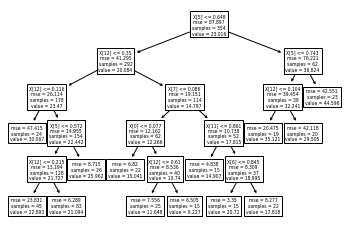

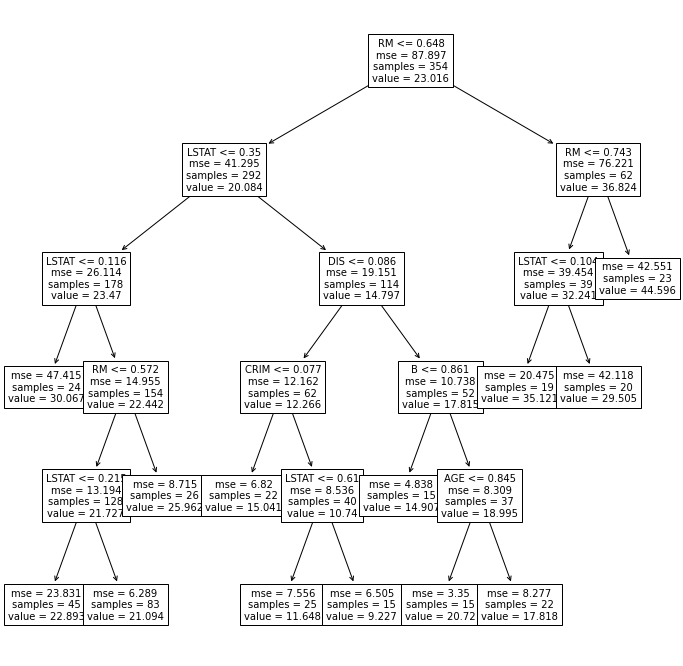

In [107]:
# Plot tree
tree.plot_tree(best_model)
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(best_model, fontsize=10, feature_names=X.columns)
plt.show()

<AxesSubplot:>

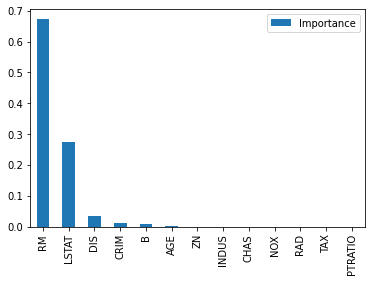

In [108]:
# Variable importance
importance = best_model.feature_importances_
# Adding name of cols
importance = pd.DataFrame(importance, index=X.columns, 
                          columns=["Importance"])

# Sort values
importance = importance.sort_values(by=['Importance'], ascending=False)

importance.plot.bar()

In conclusion, we get 2 good models one pruned, easier to explain but with less accuracy and another more complex but high accuracy. Depending on the purpose, we could choose the right one (eg if prediction is the goal, higher accuracy might be the metric to follow but if we are focused on describe what is impacting prices, a shorter version of the model might be enough)

In [ ]:
# Create pipeline - for another lesson we can convert all this on a pipeline 